Relatório

Utilizar a API do Google não foi possível pelo fato da instituição cobrar pra ativar a chave que nos dá acesso

Temos a ideia do calculo das distâncias utilizando outras APIs
como a Geopy acima, que utiliza Numination e ou Bing maps

Ou calcular a distância euclidiana e multiplicar pela curvatura da terra, que ficou bem distante do calculo feito pelo Googlemaps

Se a ideia for colocar o mapa na aplicação, precisaremos incorporar o mapa e tentar utilizar a API do Google maps, para poder modifica-la na aplicação em tempo real

Ou então usar a biblioteca Folium para plotar o mapa, pois ela tem funções de zoom, exibir coordenadas ao clicar, e também mostrar e colorir áreas ao redor


Comparando o calculo das distâncias de 3 formas


*   no site do GoogleMaps
*   utilizando a biblioteca Geopy
*   calculando a distancia euclidiana com a curvatura da terra











In [2]:
from geopy import distance
import math

Pelo mapa do Google

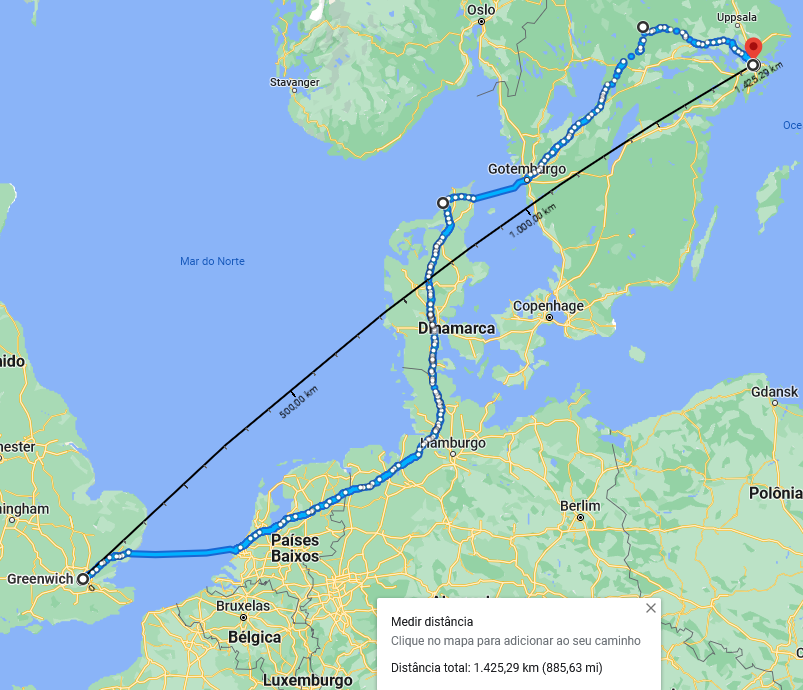

Com Geopy

In [3]:
Greenwich = (51.51118220425877, 0.07435542431645129)
Estocolmo = (59.31993898021717, 18.0729549618033)

print(distance.distance(Greenwich, Estocolmo).km)

1425.8788414390272


Calculo com curvatura da Terra

In [4]:
Greenwich = (51.51118220425877, 0.07435542431645129)
Estocolmo = (59.31993898021717, 18.0729549618033)

distancia = math.sqrt( (Greenwich[0] - Estocolmo[0])**2 + (Greenwich[1] - Estocolmo[1])**2 )
distancia *= 111.195

print(distancia)

2181.59451760482


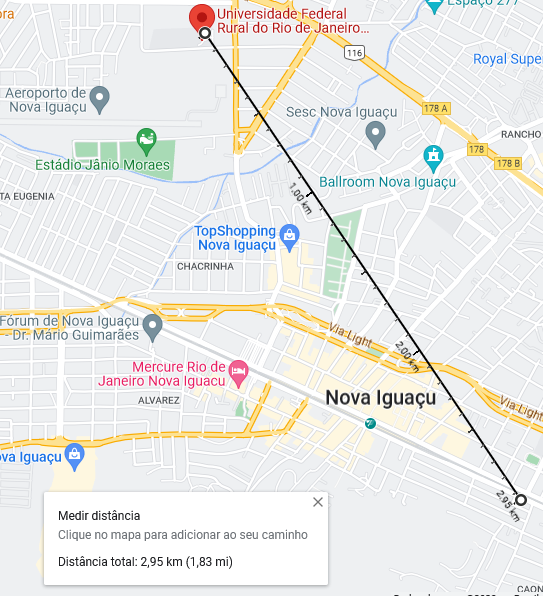

Com Geopy

In [5]:
IM = (-22.74164694505034, -43.458711335732325)
Teatro = (-22.764181236925374, -43.44237644372982)

print(distance.geodesic(IM, Teatro).km)

3.0070069389538103


Calculo com curvatura da Terra

In [6]:
IM = (-22.74164694505034, -43.458711335732325)
Teatro = (-22.764181236925374, -43.44237644372982)

distancia = math.sqrt( (Teatro[0] - IM[0])**2 + (Teatro[1] - IM[1])**2 )
distancia *= 111.195

print(distancia)

3.0947847994306894


In [7]:
import folium

In [39]:
#criando o mapa
mapa = folium.Map([-22.74164694505034, -43.458711335732325], zoom_start = 15)

#colocando o marcador no IM
folium.Marker([-22.74164694505034, -43.458711335732325],
              tooltip='IM').add_to(mapa)

#criando os 3 raios a partir do IM, de 1, 2, e 3 Km
folium.Circle([-22.74164694505034, -43.458711335732325], radius=3000, fill=True, color = "yellow").add_to(mapa)
folium.Circle([-22.74164694505034, -43.458711335732325], radius=2000, fill=True, color ="red").add_to(mapa)
folium.Circle([-22.74164694505034, -43.458711335732325], radius=1000, fill=True).add_to(mapa)

#incluindo a função de aparecer um marcador onde clicar no mapa, dois cliques no marcador e ele some
mapa.add_child(folium.ClickForMarker())

mapa